In [31]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.cluster import KMeans
#from sklearn.cluster import hierarchical
from sklearn.preprocessing import StandardScaler

In [16]:
# import csv data as dataframe using pandas
data = pd.read_csv('Country-data.csv',index_col=0)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [17]:
# creating a corretation dataframe to find corrrelation between the features
correlation = data.corr()
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


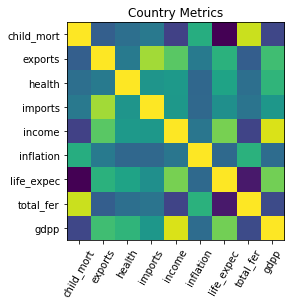

In [18]:
# ploting a heatmap of the correlation of the features
fig,ax=plt.subplots()
heatmap=ax.imshow(correlation)
ax.set_xticks(np.arange(len(correlation)))
ax.set_yticks(np.arange(len(correlation)))
ax.set_xticklabels(correlation.columns,rotation=60)
ax.set_yticklabels(correlation.columns)
ax.set_title('Country Metrics')
plt.show()

the correaltion values are high betwwen features 1.child_mort-life_expec(-)  2.child_mort-total_fer(+)  3.exports-imports(=)  4.income-gdpp(+)  5.life_expec-total_fer(-) (we are considering absolute values above 0.75 as having high correlation)

standardization of features 

In [27]:
# creating a function for standardizing the values
def standardized(dataframe):
    standard=StandardScaler()
    standard_array = standard.fit_transform(dataframe)
    standard_df = pd.DataFrame(standard_array,columns=dataframe.columns,index=dataframe.index)
    return standard_df # returns a dataframe with standardized values

In [28]:
standardized(data)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


clustering without principle component analysis

In [37]:
# Kmeans clustering 
kmean_model=KMeans(n_clusters=3)
kmean_cluster=pd.DataFrame(kmean_model.fit_predict(standardized(data)),index=data.index,columns=['Cluster'])
kmean_cluster

,Cluster
country,
Afghanistan,0
Albania,1
Algeria,1
Angola,0
Antigua and Barbuda,1
...,...
Vanuatu,1
Venezuela,1
Vietnam,1


In [40]:
kmean_cluster.loc['Yemen']

Cluster    0
Name: Yemen, dtype: int32